<a href="https://colab.research.google.com/github/ShiNik/DeepLearning_Tensorflow/blob/master/linear_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !ls "/content/drive/My Drive/"
print('curretn location in google drive')
%pwd
print('list down the current folders and files in current location')
!ls
print('change the directory to current directory')
print('===========================')
%cd '/content/drive'
print('list down the current folders and files in drive')
!ls


curretn location in google drive
list down the current folders and files in current location
docker-compose.yml  linear_regression_analysis.ipynb  output	 src
installation	    logs			      README.md
change the directory to cloned wiki_ml repository
/content/wiki_ml/src
list down the current folders and files in wiki_ml
analysis_info.py       factory.py		       parser.py
config.py	       __init__.py		       singleton.py
database_manager.py    log_manager.py		       statistics.py
data_cleaner.py        machine_learning_components.py  util.py
data_fetch_manager.py  machine_learning_manager.py     visualizer.py
data_processor.py      main.py			       wiki_extractor.py


In [0]:
#pip install 'setuptools>=36.2.1'

In [0]:
#pip install wikitextparser

     |████████████████████████████████| 61kB 1.9MB/s 


In [79]:
print('change working directory')
import os
os.chdir('/content/drive/My Drive/GitHub_projects')
!pwd
!ls


change working directory
/content/drive/My Drive/GitHub_projects
DeepLearning_Tensorflow  ImageManipulation_original
ImageManipulation	 wiki_ml_test


In [80]:
!git clone https://github.com/ShiNik/wiki_ml.git


Cloning into 'wiki_ml'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 200 (delta 112), reused 158 (delta 86), pack-reused 0
Receiving objects: 100% (200/200), 59.38 KiB | 2.47 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [82]:
os.chdir('/content/drive/My Drive/GitHub_projects/wiki_ml')
!ls

docker-compose.yml  linear_regression_analysis.ipynb  output	 src
installation	    logs			      README.md


In [122]:
import pandas as pd
# data_full_path = get_full_path(data_file_name)
df = pd.read_csv("/content/drive/My Drive/GitHub_projects/wiki_ml/ML_data.csv")

from IPython.display import display, HTML
display(HTML(df.to_html()))

,City Name,Museum visitors,City Population,Museum Name,City Visitors,Unnamed: 5
0,Paris,10200000,2148271.0,Louvre,16200000.0,NaN
1,Beijing,8610092,21542000.0,National Museum of China,NaN,NaN
2,New York City,6953927,8175133.0,Metropolitan Museum of Art,NaN,NaN
3,"Washington, D.C.",6200000,705749.0,National Air and Space Museum,NaN,NaN
4,London,5868562,8908081.0,Tate Modern,19828000.0,NaN
5,London,5829000,8908081.0,British Museum,19828000.0,NaN
6,London,5735831,8908081.0,National Gallery,19828000.0,NaN
7,London,5226000,8908081.0,"Natural History Museum, London",19828000.0,NaN
8,London,5226000,8908081.0,Natural History Museum,19828000.0,NaN
9,New York City,5000000,8175133.0,American Museum of Natural History,NaN,NaN


In [125]:
df_selected = df[['City Population', 'Museum visitors']]
df_selected = df_selected.apply (pd.to_numeric, errors='coerce')
df_selected = df_selected.dropna()
from IPython.display import display, HTML
display(HTML(df_selected.to_html()))


,City Population,Museum visitors
0,2148271.0,10200000
1,21542000.0,8610092
2,8175133.0,6953927
3,705749.0,6200000
4,8908081.0,5868562
5,8908081.0,5829000
6,8908081.0,5735831
7,8908081.0,5226000
8,8908081.0,5226000
9,8175133.0,5000000


In [131]:
x_population = df_selected['City Population'].to_numpy()
y_visitor = df_selected['Museum visitors'].to_numpy()

print("Population:")
print(x_population)

print("Visitor")
print(y_visitor)

Population:
[ 2148271. 21542000.  8175133.   705749.  8908081.  8908081.  8908081.
  8908081.  8908081.  8175133.   705749.   705749. 21542000.  8908081.
  2646204.   705749.  8335000.  7431800.  2148271. 24237800.  3616163.
  9733509.  8908081.  2148271.  8908081.  2815261. 12000600.  8175133.
  8918653.  8918653.  8918653. 24237800.  3792621. 13929286.   705749.
  2099451. 24237800.   872680.  2148271.   383083.   488050.   872680.
 24237800.    39057.  9733509.]
Visitor
[10200000  8610092  6953927  6200000  5868562  5829000  5735831  5226000
  5226000  5000000  4800000  4404212  4400000  3967566  3860644  3800000
  3670000  3600000  3551544  3540000  3500000  3300000  3286000  3175000
  3143626  2963857  2800000  2774103  2661615  2596725  2596725  2550000
  2520000  2431073  2400000  2313000  2300000  2300000  2231000  2230914
  2227773  2161160  2111730  2100000  2054719]


In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array(x_population).reshape(-1, 1)
y = np.array(y_visitor).reshape(-1, 1)

#split dataset in train and testing set    
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=10,random_state=0)

#Fitting Simple Linear regression data model to train data set
model=LinearRegression()
reg = model.fit(X_train,Y_train)
# print(model)
# reg.intercept_, reg.coef_

#predict the test set
y_pred_test_data=model.predict(X_test)


In [0]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [147]:
regression_results(Y_test, y_pred_test_data)

explained_variance:  -0.0443
mean_squared_log_error:  0.1498
r2:  -0.2558
MAE:  1275646.7758
MSE:  1765838916410.7798
RMSE:  1328848.7184


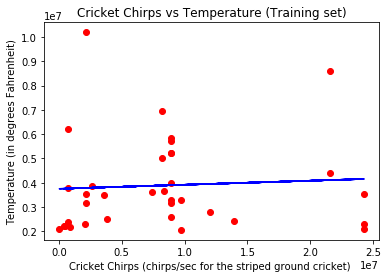

In [151]:
import matplotlib.pyplot as plt
# Visualising the Training set results in a scatter plot
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Cricket Chirps vs Temperature (Training set)')
plt.xlabel('Cricket Chirps (chirps/sec for the striped ground cricket) ')
plt.ylabel('Temperature (in degrees Fahrenheit)')
plt.show()



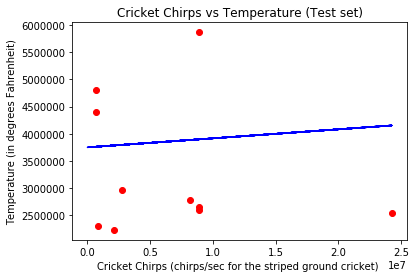

In [152]:
import matplotlib.pyplot as plt
# Visualising the test set results in a scatter plot
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Cricket Chirps vs Temperature (Test set)')
plt.xlabel('Cricket Chirps (chirps/sec for the striped ground cricket) ')
plt.ylabel('Temperature (in degrees Fahrenheit)')
plt.show()